In [1]:
import pandas as pd

raw_data = pd.read_csv('../data/creditcard.csv')
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
raw_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
# 불균형 데이터
fraud_rate = round(raw_data['Class'].value_counts()[1]/(raw_data['Class'].value_counts()[0]+raw_data['Class'].value_counts()[1])*100, 2)
print('Frauds rate: {}%'.format(fraud_rate))

Frauds rate: 0.17%


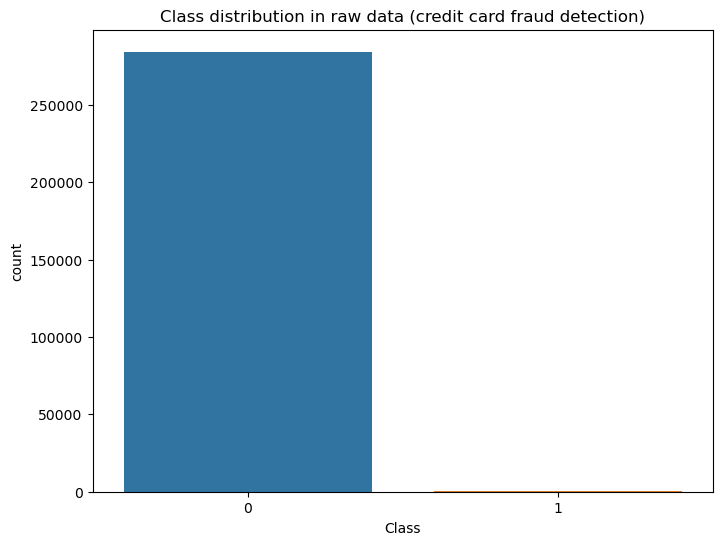

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=raw_data)
plt.title('Class distribution in raw data (credit card fraud detection)')
plt.show()

In [6]:
X = raw_data.iloc[:, 1:-1]
y = raw_data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [8]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([199020,    344], dtype=int64))

In [9]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp

array([199020,    344], dtype=int64)

In [10]:
tmp[1]/tmp.sum() * 100

0.17254870488152324

## 모델 평가를 위한 함수 작성

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    return accuracy, precision, recall, f1, roc_auc

In [12]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    accuracy, precision, recall, f1, roc_auc = get_clf_eval(y_test, pred)
    counfusion = confusion_matrix(y_test, pred)

    print('='*30)
    print('Confusion Matrix: \n{}'.format(counfusion))
    print('='*30)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, \nRecall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [13]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', random_state=13)
lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

Confusion Matrix: 
[[85284    11]
 [   60    88]]
Accuracy: 0.9992, Precision: 0.8889, 
Recall: 0.5946, F1: 0.7126, AUC: 0.7972


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

Confusion Matrix: 
[[85281    14]
 [   42   106]]
Accuracy: 0.9993, Precision: 0.8833, 
Recall: 0.7162, F1: 0.7910, AUC: 0.8580


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=13, n_jobs=-1)
rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

Confusion Matrix: 
[[85290     5]
 [   38   110]]
Accuracy: 0.9995, Precision: 0.9565, 
Recall: 0.7432, F1: 0.8365, AUC: 0.8716


In [16]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)

lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [17]:
def get_result(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    return get_clf_eval(y_test, pred)

In [18]:
def get_result_pd(models, model_names, X_train, X_test, y_train, y_test):
    tmp = []
    for model in models:
        tmp.append(get_result(model, X_train, X_test, y_train, y_test))

    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    return pd.DataFrame(tmp, index=model_names, columns=col_names)

## 모델의 비교

In [19]:
import time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, X_test, y_train, y_test)
end_time = time.time()

print(f'Runtime of this job was {end_time - start_time} seconds')
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.999169,0.888889,0.594595,0.712551,0.797233
Decision Tree,0.999345,0.883333,0.716216,0.791045,0.858026
Random Forest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


## 'Amount' 컬럼의 분포 확인 후 스케일러 적용

d:\Anaconda\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


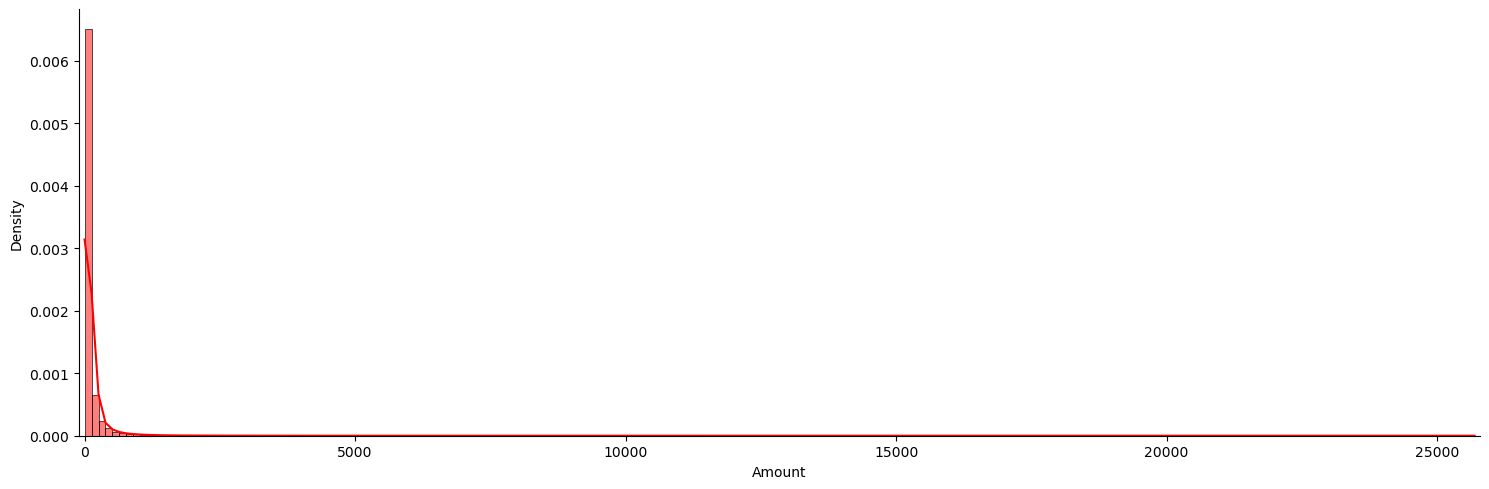

In [103]:
data_range = (0, max(raw_data['Amount']) + 100)

sns.displot(
    raw_data['Amount'], kind='hist', kde=True, binrange=data_range, bins=200,
    color='r', height=5, aspect=3, stat='density',
    kde_kws={'clip': data_range, 'bw_adjust': 5}
)

plt.xlim([-100, max(raw_data['Amount'])+100])
plt.show()

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amoun_scaled = scaler.fit_transform(raw_data['Amount'].values.reshape(-1, 1))

raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount'] = amoun_scaled
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [105]:
X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

In [106]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, X_test, y_train, y_test)
end_time = time.time()

print(f'Runtime of this job was {end_time - start_time} seconds')
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.999169,0.888889,0.594595,0.712551,0.797233
Decision Tree,0.999345,0.883333,0.716216,0.791045,0.858026
Random Forest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999520,0.949580,0.763514,0.846442,0.881722


- 스탠다드 스케일러 적용으로 인한 개선효과 없음

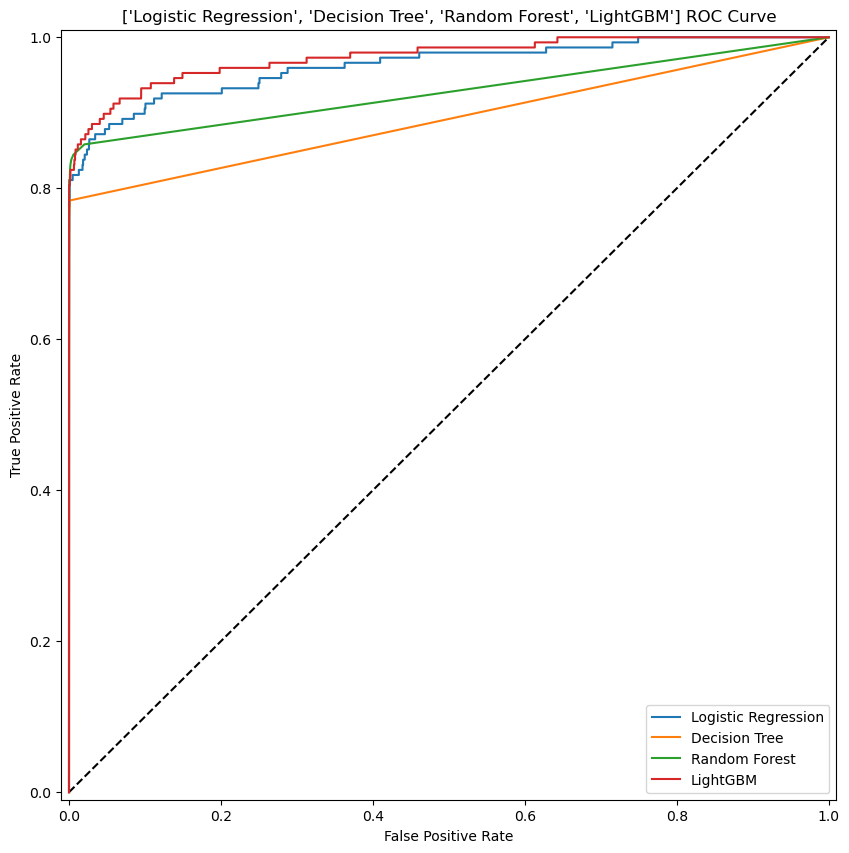

In [109]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 10))
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.plot([0, 1], [0, 1], 'k--')
    
    for i in range(len(models)):
        y_pred_proba = models[i].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=model_names[i])
        
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_names} ROC Curve')
    plt.legend()
    
draw_roc_curve(models, model_names, X_test, y_test)

In [110]:
amount_log = np.log1p(raw_data['Amount'])
raw_data_copy['Amount_scaled'] = amount_log
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,4.262539


d:\Anaconda\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


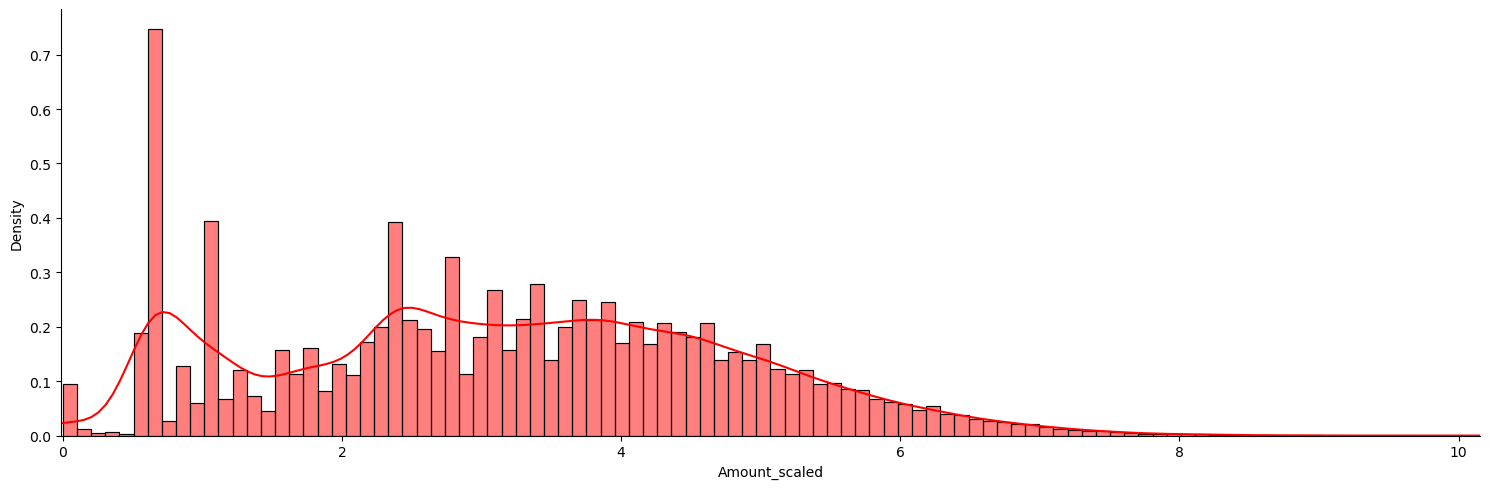

In [125]:
data_range = (0, max(raw_data_copy['Amount_scaled']) + 1)

sns.displot(
    raw_data_copy['Amount_scaled'], kind='hist', kde=True, binrange=data_range, bins=10,
    color='r', height=5, aspect=3, stat='density',
    kde_kws={'clip': data_range, 'bw_adjust': 1.5}
)

plt.xlim([-0.01, max(raw_data_copy['Amount_scaled'])])
plt.show()

In [111]:
X = raw_data.iloc[:, :-2]
y = raw_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

In [112]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, X_test, y_train, y_test)
end_time = time.time()

print(f'Runtime of this job was {end_time - start_time} seconds')
results

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.999169,0.888889,0.594595,0.712551,0.797233
Decision Tree,0.999345,0.883333,0.716216,0.791045,0.858026
Random Forest,0.999427,0.915966,0.736486,0.816479,0.868185
LightGBM,0.999508,0.941667,0.763514,0.843284,0.881716


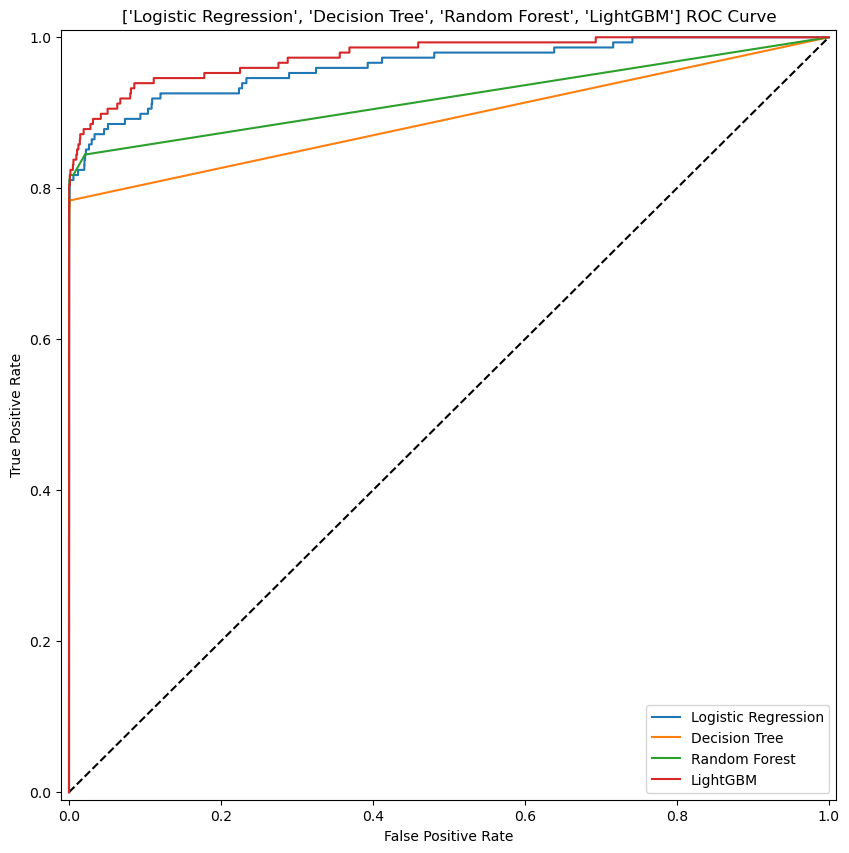

In [127]:
draw_roc_curve(models, model_names, X_test, y_test)

## 아웃라이어

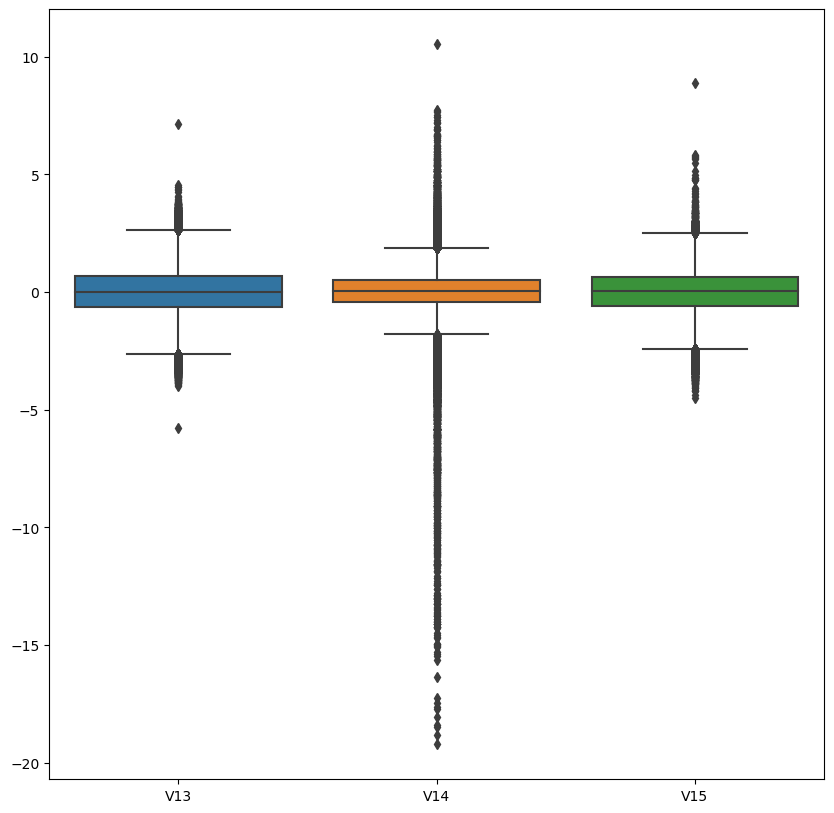

In [130]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=raw_data[['V13', 'V14', 'V15']])
plt.show()

In [131]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [132]:
get_outlier(df=raw_data, column='V14')

Index([8296, 8615, 9035, 9252], dtype='int64')

In [133]:
raw_data_copy.shape

(284807, 30)

In [134]:
outlier_index = get_outlier(df=raw_data, column='V14')
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 30)

In [136]:
X = raw_data_copy
raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [137]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, X_test, y_train, y_test)
end_time = time.time()

print(f'Runtime of this job was {end_time - start_time} seconds')
results

[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.999286,0.904762,0.650685,0.756972,0.825284
Decision Tree,0.999427,0.870229,0.780822,0.823105,0.890311
Random Forest,0.999520,0.926829,0.780822,0.847584,0.890358
LightGBM,0.999602,0.951613,0.808219,0.874074,0.904074


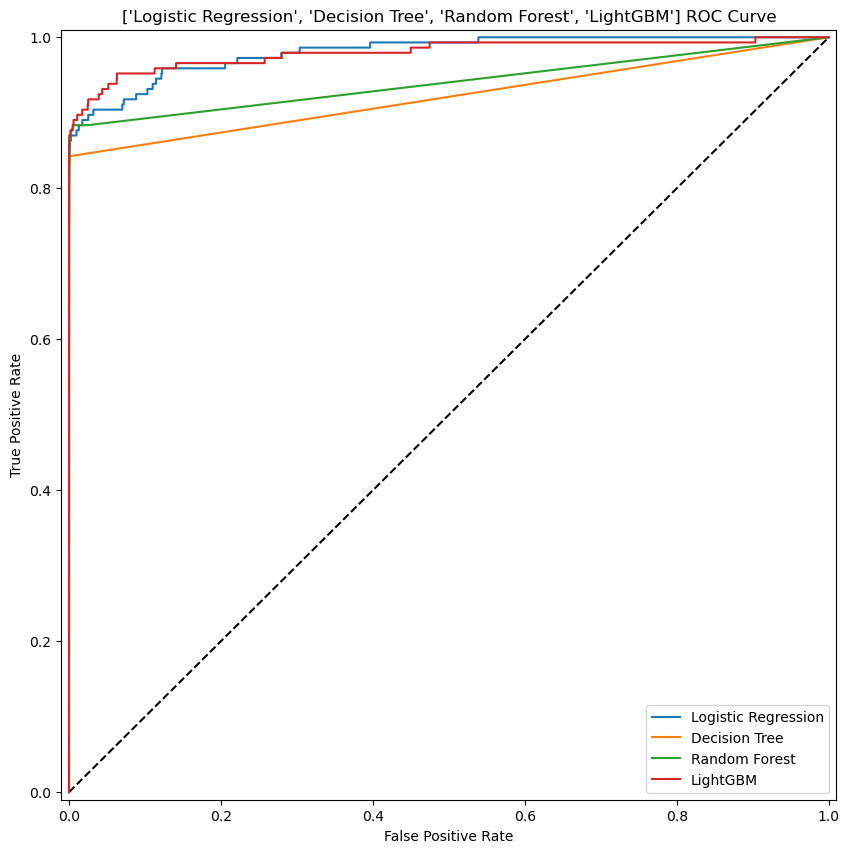

In [138]:
draw_roc_curve(models, model_names, X_test, y_test)

## Oversampling

In [139]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)

X_train_over, y_train_over = smote.fit_resample(X_train, y_train) # 테스트 테이터에 대한 조작이 아님

In [141]:
X_train.shape, y_train.shape

((199362, 30), (199362,))

In [140]:
X_train_over.shape, y_train_over.shape

((398040, 30), (398040,))

In [143]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1], dtype=int64), array([199020,    342], dtype=int64))
(array([0, 1], dtype=int64), array([199020, 199020], dtype=int64))


In [144]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models, model_names, X_train_over, X_test, y_train_over, y_test)
end_time = time.time()

print(f'Runtime of this job was {end_time - start_time} seconds')
results

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

,accuracy,precision,recall,f1,roc_auc
Logistic Regression,0.975445,0.059169,0.897260,0.111017,0.936420
Decision Tree,0.978441,0.064234,0.856164,0.119503,0.917407
Random Forest,0.999520,0.877698,0.835616,0.856140,0.917709
LightGBM,0.999532,0.873239,0.849315,0.861111,0.924552


- 데이터가 늘어난 만큼 학습시간도 오래 걸림
- 데이터 불균형 문제가 해소되면서 성능이 개선됨

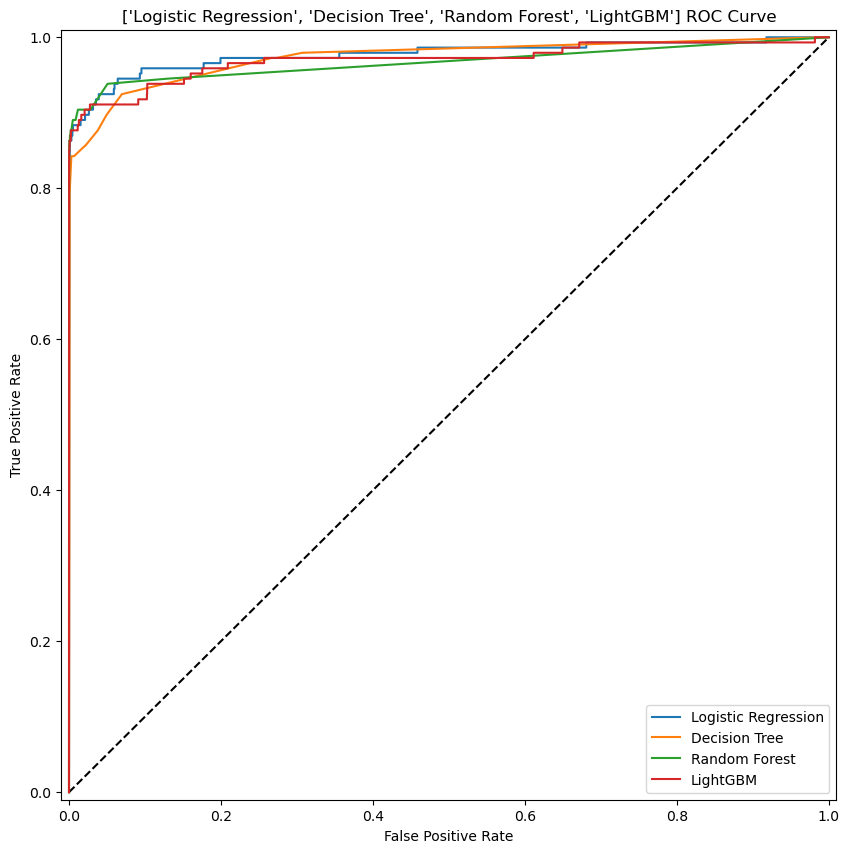

In [145]:
draw_roc_curve(models, model_names, X_test, y_test)